# Field manipulation and Saving the Radar Object to a file.

In [1]:
# In this notebook we will go over the basics of how to change the data inside a
# radar file and save a new radar file. We will do this by creating a new field
# that stores a reflectivity mask.

In [2]:
# Import needed modules.
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
# Read the radar data.
radar = pyart.io.read("sgpcsaprsurcmacI7.c0.20110520.095101.nc")

In [4]:
# Store the radar field into a variable.
ref_field = radar.fields['reflectivity_horizontal']['data'].copy()

In [5]:
# To create an array that is zero when the condition is false and one when it is true, we
# can make use of the np.ma.where command.
ref_gt_0 = np.ma.where(ref_field > 0, 1, 0)
print(ref_gt_0)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [6]:
# To create a new field, we need to create a dictionary with keys containing the data,
# the long name, the units, the fill value, and the standard name.
mask_dict = {'data': ref_gt_0, 'units': '0 = Z < 0, 1 = Z >= 0', 'long_name': 'reflectivity_mask',
             '_FillValue': ref_gt_0.fill_value, 'standard_name': 'reflectivity_mask'}

In [7]:
# Adding this field into the radar object using radar.add_field()
radar.add_field('reflectivity_mask', mask_dict, replace_existing=True)

C:\Users\sherm\Anaconda3\envs\pyart_env\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\sherm\Anaconda3\envs\pyart_env\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


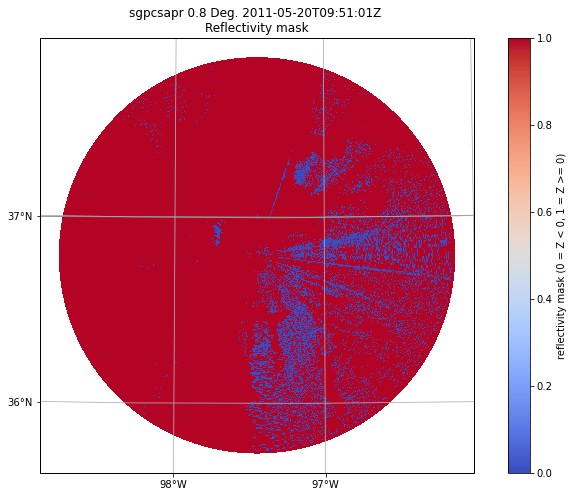

In [8]:
# Plot the data using RadarMapDisplay
plt.figure(figsize=[12, 8])
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity_mask', projection=projection, cmap='coolwarm', vmin=0, vmax=1)

In [9]:
# Writing this radar object to a new file is as simple as using pyart.io.write_cfradial()
pyart.io.write_cfradial('new_radar.nc', radar)